In [70]:
import numpy
from matplotlib import pyplot, cm, rcParams
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
rcParams['font.size'] = 14

In [98]:
# Space Discretizations
Lx = 8                      # length in x direction (horizontal)
Ly = 2                      # length in y direction (vertical)
nx = 201                     # number of discretizations in x
ny = 51                     # number of discretizations in y
dx = Lx/(nx-1)               # spatial increment in x
dy = Ly/(ny-1)               # spatial increment in y
x = numpy.linspace(0,Lx,nx) # array for plotting in x
y = numpy.linspace(0,Ly,ny) # array for plotting in y
X,Y = numpy.meshgrid(x,y)   # mesh grid for plotting

sigma = 1.0
c = 10

# time discretization
time = 10        # total time in seconds
nt = 1001        # number of time steps
dt = sigma*dx/c # time increment

In [148]:
def init_cond(ny,nx,Lx,Ly,X,Y):
    """Creates initial conditions for 2D wave, a Guassian function centered on
        the top edge of the box and spread out over the middle.
    
    Parameters:
    -----------
    ny: int
        number of spatial steps in vertical direction
    nx: int 
        number of spatial steps in horizontal direction
    Lx: int
        total length in x direction
    Ly: int
        total length in y direction
    X:  2D array of float
        meshgrid in x
    Y:  2D array of float
        meshgrin in y
        
    Returns:
    --------
    pi: 2D array of floats
        initial gaussian pressure distribution
        indexing: pi[vertical space step, horizontal space step]
    """
    # Gaussian wave function, f 
    a = 1         # amplitude of wave
    sprx = Lx*0.7   # spread of wave in x dir
    spry = 0.2*Ly # spread of wave in y dir
    x0 = Lx/2     # center of wave
    y0 = Ly       # center of wave
    f = a*numpy.exp(-((X-x0)**2/(2*sprx**2) + (Y-y0)**2/(2*spry**2)))
    
    pi = numpy.zeros((ny,nx)) # initiallize pressure array
    pi = f                    # assign f to initial pressure array 
    
    return pi

In [64]:
def solve_wave(pi, dy, dx, nt, dt, c):
    """Solves the 2D wave equation using the ______ scheme
    
    Parameters:
    -----------
    
    Returns:
    --------
    
    """
    p = numpy.zeros((nt,ny,nx))
    p[0] = pi[0].copy()
    p[1] = pi[1].copy()
    
    sx = c*dt/dx
    sy = c*dt/dy
    
    for n in range(2,nt-2):
        
        # iterate through time steps
        #p[n+1,1:-1,1:-1] = 2*p[n,1:-1,1:-1] - p[n-1,1:-1,1:-1] + dt**2*c**2*\
        #           ((p[n,1:-1,2:] - 2*p[n,1:-1,1:-1] + p[n,1:-1,:-2])/dx**2 +\
        #           (p[n,2:,1:-1] - 2*p[n,1:-1,1:-1] + p[n,:-2,1:-1])/dy**2) 
    
        p[n+1,1:-1,1:-1] = sx**2*(p[n,1:-1,2:] + p[n,1:-1,:-2]) +\
                           sy**2*(p[n,2:,1:-1] + p[n,:-2,1:-1]) -\
                           2*(1 - sx**2 - sy**2)*p[n,1:-1,1:-1] - \
                           p[n-1,1:-1,1:-1]
    
    
        # apply boundary conditions
        p[n+1,:,0] = 0  # left wall
        p[n+1,:,-1] = 0 # right wall
        p[n+1,0,:] = 0  # bottom wall
        p[n+1,-1,:] = 0 # top wall
        
    return p

In [151]:
pi = init_cond(ny,nx,nt)
p = solve_wave(pi.copy(),dy,dx,nt,dt,c)

TypeError: init_cond() missing 3 required positional arguments: 'Ly', 'X', and 'Y'

# TESTING

In [67]:
p[1].max()

0.0

In [63]:
c*dt/dx

1.0

In [93]:
# gaussian initial condition
x = numpy.linspace(-2,2,50)
y = numpy.linspace(-2,2,50)
X,Y = numpy.meshgrid(x,y)

a = 1    # amplitude of wave
sprx = 2 # spread of wave in x dir
spry = 1 # spread of wave in y dir
x0 = 0   # center of wave
y0 = -1   # center of wave
f = a*numpy.exp(-((X-x0)**2/(2*sprx**2) + (Y-y0)**2/(2*spry**2)))

In [143]:
# Gaussian wave function 
a = 1         # amplitude of wave
sprx = Lx*0.7   # spread of wave in x dir
spry = 0.2*Ly # spread of wave in y dir
x0 = Lx/2     # center of wave
y0 = Ly       # center of wave
f = a*numpy.exp(-((X-x0)**2/(2*sprx**2) + (Y-y0)**2/(2*spry**2)))

In [144]:
numpy.shape(f)

(51, 201)

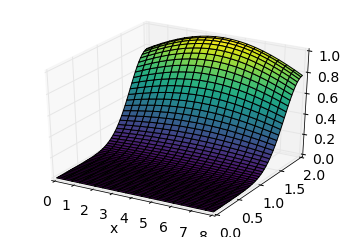

In [145]:
fig = pyplot.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,f,rstride=1,cstride=10,cmap=cm.viridis)
ax.set_xlim(0,8)
ax.set_ylim(0,2)
ax.set_xlabel('x');

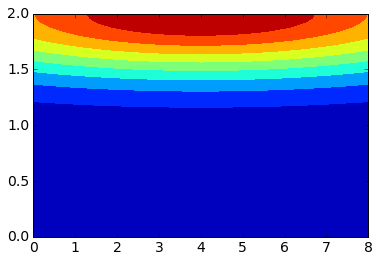

In [149]:
pi = init_cond(ny,nx,Lx,Ly,X,Y)
fig = pyplot.figure()
pyplot.contourf(X,Y,pi,levels=numpy.linspace(0,1,10));

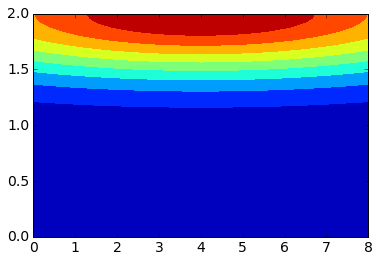

In [150]:
fig = pyplot.figure()
pyplot.contourf(X,Y,f,levels=numpy.linspace(0,1,10));